# G2M insight for Cab Investment firm Project





In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import seaborn as sb
from scipy import stats


# Reading Data

In [2]:
master_data=pd.read_csv("datasets/master_data.csv")

master_data

Transaction ID  Date of Travel     Company            City  \
0             10000011           42377    Pink Cab      ATLANTA GA   
1             10351127           43302  Yellow Cab      ATLANTA GA   
2             10412921           43427  Yellow Cab      ATLANTA GA   
3             10000012           42375    Pink Cab      ATLANTA GA   
4             10320494           43211  Yellow Cab      ATLANTA GA   
...                ...             ...         ...             ...   
359387        10439790           43107  Yellow Cab      SEATTLE WA   
359388        10439799           43103  Yellow Cab  SILICON VALLEY   
359389        10439838           43104  Yellow Cab       TUCSON AZ   
359390        10439840           43106  Yellow Cab       TUCSON AZ   
359391        10439846           43104  Yellow Cab       TUCSON AZ   

        KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode  \
0              30.45         370.95      313.6350        29290         Card   
1              26.19         598.70      317.4228        29290         Cash   
2              42.55         792.05      597.4020        29290         Card   
3              28.62         358.52      334.8540        27703         Card   
4              36.38         721.10      467.1192        27703         Card   
...              ...            ...           ...          ...          ...   
359387         16.66         261.18      213.9144        38520         Card   
359388         13.72         277.97      172.8720        12490         Cash   
359389         19.00         303.77      232.5600        41414         Card   
359390          5.60          92.42       70.5600        41677         Cash   
359391         13.30         244.65      180.3480        39761         Card   

        Gender  Age  Income (USD/Month)  Population    Users date_of_travel  \
0         Male   28               10813    814885.0  24701.0     2016-01-10   
1         Male   28               10813    814885.0  24701.0     2018-07-23   
2         Male   28               10813    814885.0  24701.0     2018-11-25   
3         Male   27                9237    814885.0  24701.0     2016-01-08   
4         Male   27                9237    814885.0  24701.0     2018-04-23   
...        ...  ...                 ...         ...      ...            ...   
359387  Female   42               19417    671238.0  25063.0     2018-01-09   
359388    Male   33               18713   1177609.0  27247.0     2018-01-05   
359389    Male   38                3960    631442.0   5712.0     2018-01-06   
359390    Male   23               19454    631442.0   5712.0     2018-01-08   
359391  Female   32               10128    631442.0   5712.0     2018-01-06   

        year  month  day  week    Profit  
0       2016      1   10     1   57.3150  
1       2018      7   23    30  281.2772  
2       2018     11   25    47  194.6480  
3       2016      1    8     1   23.6660  
4       2018      4   23    17  253.9808  
...      ...    ...  ...   ...       ...  
359387  2018      1    9     2   47.2656  
359388  2018      1    5     1  105.0980  
359389  2018      1    6     1   71.2100  
359390  2018      1    8     2   21.8600  
359391  2018      1    6     1   64.3020  

[359392 rows x 20 columns]

In [3]:
master_data.describe()

Transaction ID  Date of Travel   KM Travelled  Price Charged  \
count    3.593920e+05   359392.000000  359392.000000  359392.000000   
mean     1.022076e+07    42964.067998      22.567254     423.443311   
std      1.268058e+05      307.467197      12.233526     274.378911   
min      1.000001e+07    42371.000000       1.900000      15.600000   
25%      1.011081e+07    42697.000000      12.000000     206.437500   
50%      1.022104e+07    42988.000000      22.440000     386.360000   
75%      1.033094e+07    43232.000000      32.960000     583.660000   
max      1.044011e+07    43465.000000      48.000000    2048.030000   

        Cost of Trip    Customer ID            Age  Income (USD/Month)  \
count  359392.000000  359392.000000  359392.000000       359392.000000   
mean      286.190113   19191.652115      35.336705        15048.822937   
std       157.993661   21012.412463      12.594234         7969.409482   
min        19.000000       1.000000      18.000000         2000.000000   
25%       151.200000    2705.000000      25.000000         8424.000000   
50%       282.480000    7459.000000      33.000000        14685.000000   
75%       413.683200   36078.000000      42.000000        21035.000000   
max       691.200000   60000.000000      65.000000        35000.000000   

         Population          Users           year          month  \
count  3.593920e+05  359392.000000  359392.000000  359392.000000   
mean   3.132198e+06  158365.582267    2017.052628       7.475851   
std    3.315194e+06  100850.051020       0.802452       3.464767   
min    2.489680e+05    3643.000000    2016.000000       1.000000   
25%    6.712380e+05   80021.000000    2016.000000       5.000000   
50%    1.595037e+06  144132.000000    2017.000000       8.000000   
75%    8.405837e+06  302149.000000    2018.000000      10.000000   
max    8.405837e+06  302149.000000    2019.000000      12.000000   

                 day           week         Profit  
count  359392.000000  359392.000000  359392.000000  
mean       15.659784      30.499869     137.253198  
std         8.797606      15.212790     160.311840  
min         1.000000       1.000000    -220.060000  
25%         8.000000      18.000000      28.012000  
50%        16.000000      33.000000      81.962000  
75%        23.000000      44.000000     190.030000  
max        31.000000      52.000000    1463.966000

In [4]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  float64
 13  Users               359392 non-null  float64
 14  date_of_travel      359392 non-null  object 
 15  year                359392 non-nul

### All Column master data visualize pairplot head 1000 data for each cab

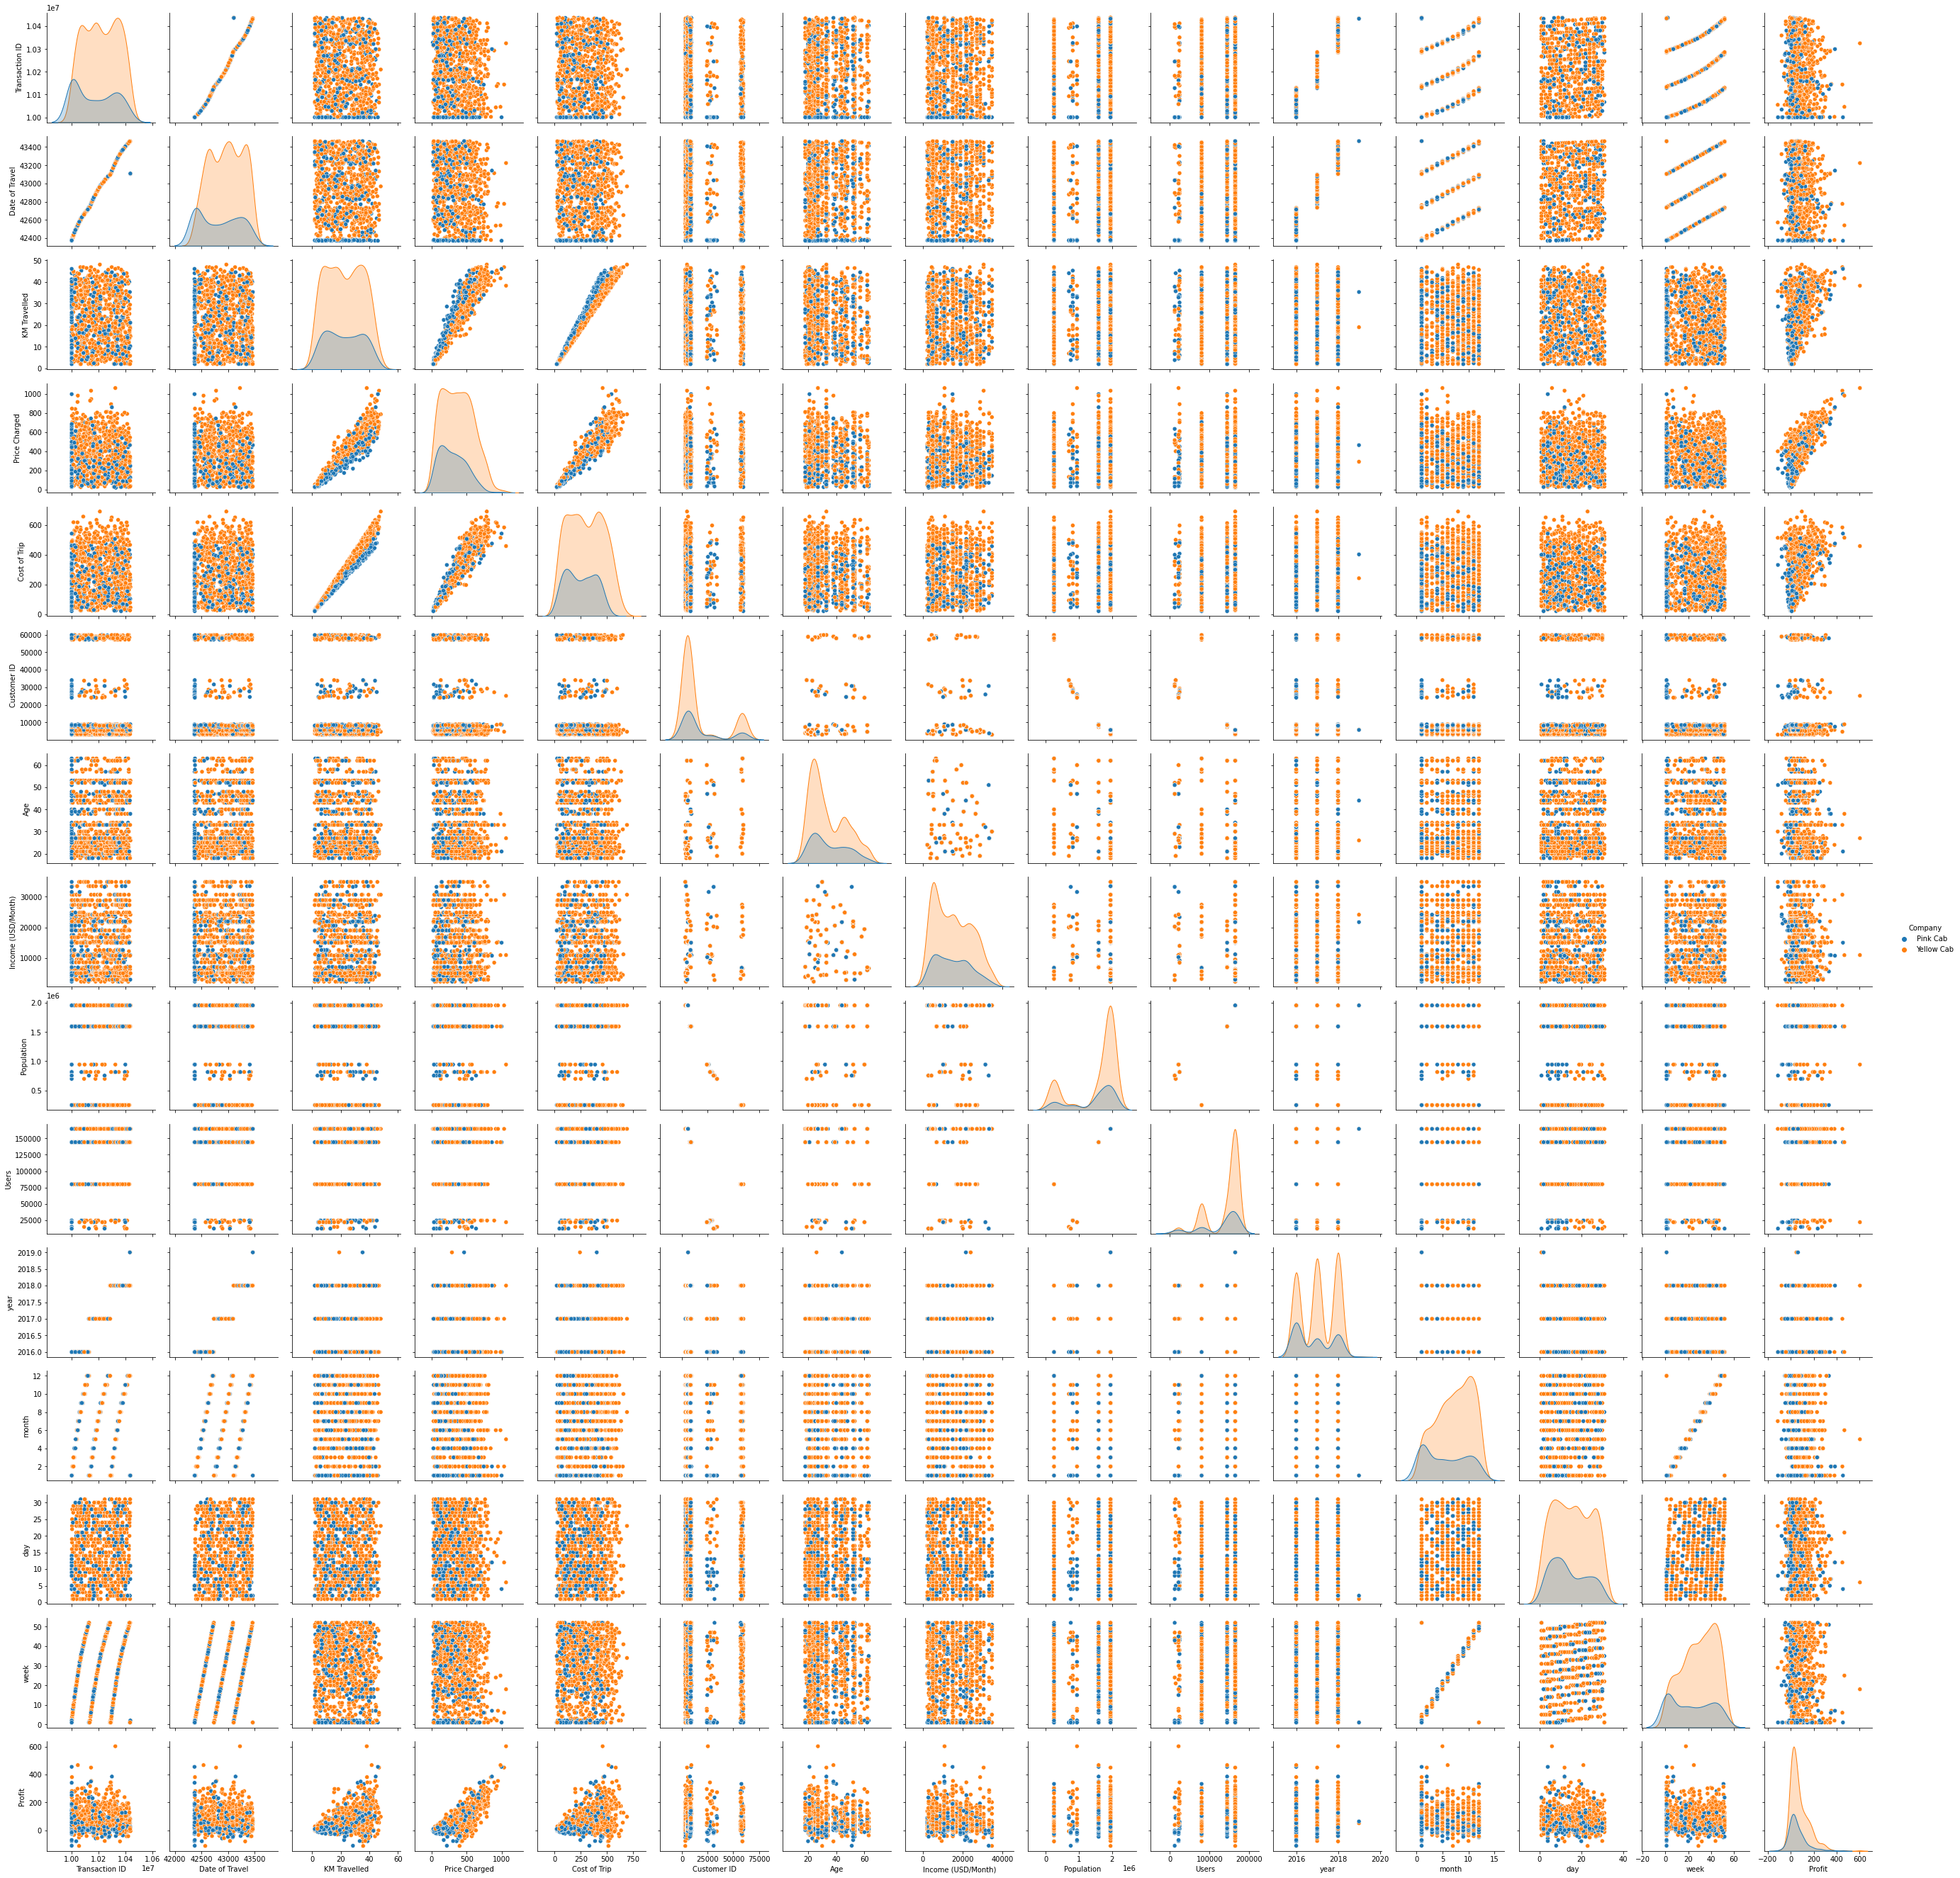

In [5]:
sns.pairplot(master_data.head(1000), hue = 'Company')

##### Km Travelled and Price Charged high correlation

##### Price Charged and Cost  of trip high correlation

##### Cost of trip km travelled high correlation

### Check the Correlation

In [3]:
master_data_corr = master_data.corr()
master_data_corr

Transaction ID  Date of Travel  KM Travelled  \
Transaction ID            1.000000        0.993030     -0.001429   
Date of Travel            0.993030        1.000000     -0.001621   
KM Travelled             -0.001429       -0.001621      1.000000   
Price Charged            -0.052902       -0.055559      0.835753   
Cost of Trip             -0.003462       -0.004484      0.981848   
Customer ID              -0.016912       -0.017653      0.000389   
Age                      -0.001267       -0.001346     -0.000369   
Income (USD/Month)       -0.001570       -0.001368     -0.000544   
Population                0.023868        0.022102     -0.002311   
Users                     0.013526        0.011780     -0.000428   
year                      0.941345        0.938317     -0.001007   
month                     0.279026        0.307199     -0.001987   
day                       0.010333        0.018881      0.000751   
week                      0.267092        0.295951     -0.001978   
Profit                   -0.087130       -0.090672      0.462768   

                    Price Charged  Cost of Trip  Customer ID       Age  \
Transaction ID          -0.052902     -0.003462    -0.016912 -0.001267   
Date of Travel          -0.055559     -0.004484    -0.017653 -0.001346   
KM Travelled             0.835753      0.981848     0.000389 -0.000369   
Price Charged            1.000000      0.859812    -0.177324 -0.003084   
Cost of Trip             0.859812      1.000000     0.003077 -0.000189   
Customer ID             -0.177324      0.003077     1.000000 -0.004735   
Age                     -0.003084     -0.000189    -0.004735  1.000000   
Income (USD/Month)       0.003228     -0.000633    -0.013608  0.003907   
Population               0.326589      0.015108    -0.647052 -0.009002   
Users                    0.281061      0.023628    -0.610742 -0.005906   
year                    -0.036221     -0.001687    -0.003272 -0.000719   
month                   -0.060999     -0.008457    -0.042441 -0.001947   
day                     -0.004112      0.001000     0.001838  0.000243   
week                    -0.060957     -0.008441    -0.041593 -0.002351   
Profit                   0.864154      0.486056    -0.306527 -0.005093   

                    Income (USD/Month)  Population     Users      year  \
Transaction ID               -0.001570    0.023868  0.013526  0.941345   
Date of Travel               -0.001368    0.022102  0.011780  0.938317   
KM Travelled                 -0.000544   -0.002311 -0.000428 -0.001007   
Price Charged                 0.003228    0.326589  0.281061 -0.036221   
Cost of Trip                 -0.000633    0.015108  0.023628 -0.001687   
Customer ID                  -0.013608   -0.647052 -0.610742 -0.003272   
Age                           0.003907   -0.009002 -0.005906 -0.000719   
Income (USD/Month)            1.000000    0.011868  0.010464 -0.001798   
Population                    0.011868    1.000000  0.915490  0.000507   
Users                         0.010464    0.915490  1.000000 -0.000669   
year                         -0.001798    0.000507 -0.000669  1.000000   
month                         0.000942    0.062754  0.036055 -0.039574   
day                           0.000656    0.001523  0.000704 -0.031730   
week                          0.000855    0.061764  0.035439 -0.046149   
Profit                        0.006148    0.544079  0.457758 -0.060332   

                       month       day      week    Profit  
Transaction ID      0.279026  0.010333  0.267092 -0.087130  
Date of Travel      0.307199  0.018881  0.295951 -0.090672  
KM Travelled       -0.001987  0.000751 -0.001978  0.462768  
Price Charged      -0.060999 -0.004112 -0.060957  0.864154  
Cost of Trip       -0.008457  0.001000 -0.008441  0.486056  
Customer ID        -0.042441  0.001838 -0.041593 -0.306527  
Age                -0.001947  0.000243 -0.002351 -0.005093  
Income (USD/Month)  0.000942  0.000656  0.000855  0.006148  
Population  

### Correlation visualize master data all column with heatmap


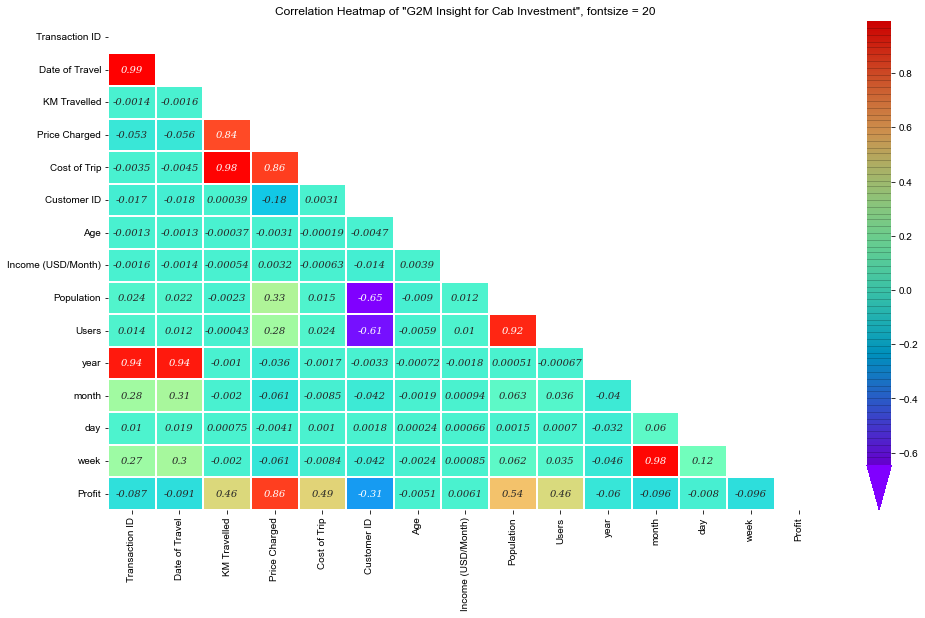

In [4]:
# Define the figure size
plt.figure(figsize = (16, 9))

# Cutomize the annot
annot_kws={'fontsize':10,                      # To change the size of the font
           'fontstyle':'italic',               # To change the style of font 
           'fontfamily': 'serif',              # To change the family of font 
           'alpha':1 }                         # To change the transparency of the text  


# Customize the cbar
cbar_kws = {"shrink":1,                        # To change the size of the color bar
            'extend':'min',                    # To change the end of the color bar like pointed
            'extendfrac':0.1,                  # To adjust the extension of the color bar
            "drawedges":True,                  # To draw lines (edges) on the color bar
           }

# take upper correlation matrix
matrix = np.triu(master_data_corr)

# Generate heatmap correlation
ax = sns.heatmap(master_data_corr, mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Heatmap of "G2M Insight for Cab Investment", fontsize = 20')

# Set the size of text
sns.set(font_scale = 1.2)

### Cost of trip and km Travelled have high correlation

### Users Travel


In [6]:
user=master_data.groupby('Company')
avg_user = user.Users.mean()
index = avg_user.index
value = avg_user.values 

In [7]:
avg_user

Company
Pink Cab      125590.813330
Yellow Cab    168473.246981
Name: Users, dtype: float64

In [8]:
avg_user.describe()

count         2.000000
mean     147032.030156
std       30322.459628
min      125590.813330
25%      136311.421743
50%      147032.030156
75%      157752.638568
max      168473.246981
Name: Users, dtype: float64

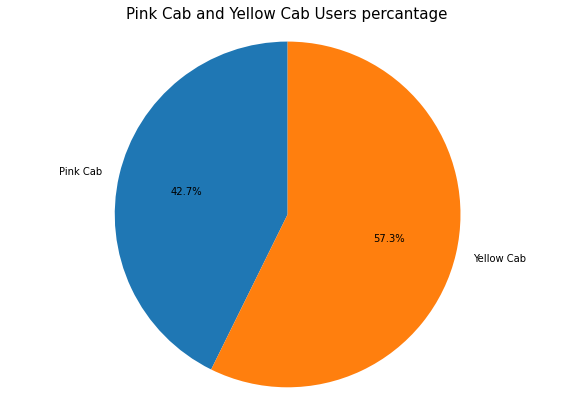

In [9]:
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(value , labels=index, autopct='%1.1f%%',shadow=False, startangle=90,)
axp.axis('equal')

plt.title('Pink Cab and Yellow Cab Users percantage', fontsize = 15)
plt.show()

### No significant difference between the average number of users of both taxi companies

### Price Charged


/Users/baris/opt/anaconda3/envs/homev/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


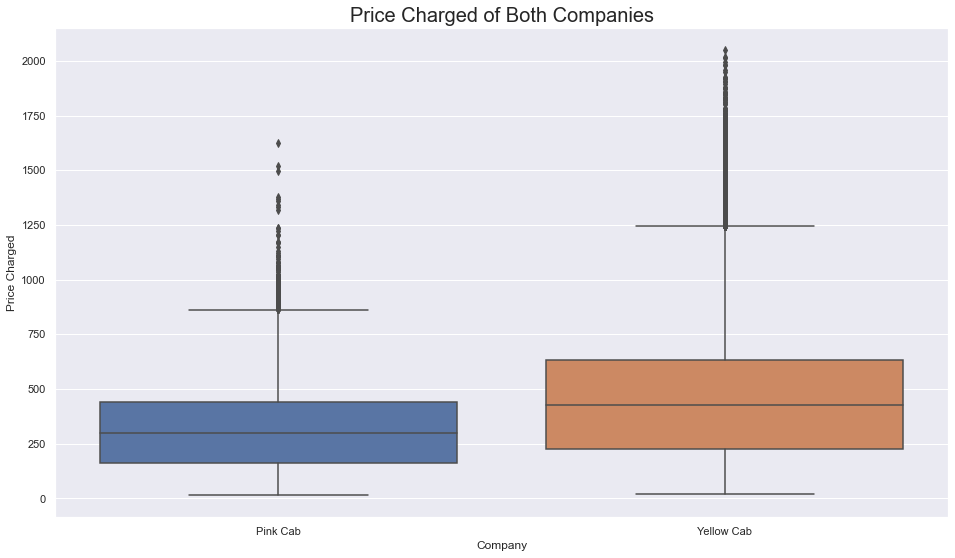

In [8]:
sns.set(style = 'darkgrid')

plt.figure(figsize = (16, 9))

sns.boxplot(master_data['Company'], master_data['Price Charged'])
plt.title('Price Charged of Both Companies', fontsize=20)
plt.show()


### Pink cab taxi company's price charged average is 280 dollars while yellow cab's average  is 380 dollars 

## Gender For Each Company nunique customer data 

In [3]:
gender_cab=master_data.groupby(['Company','Gender'])
gender_cab  = gender_cab['Customer ID'].nunique()
print(gender_cab)

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer ID, dtype: int64


### According to gender and company column unique male customer and unique female customer

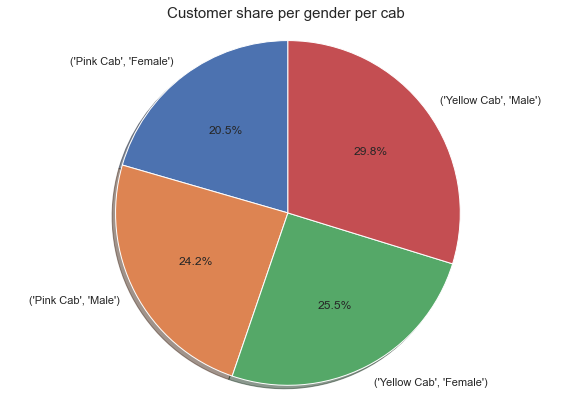

In [10]:
labs = gender_cab.index
vals = gender_cab.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Customer share per gender per cab', fontsize = 15)
plt.show()

### Both taxi companies have similar proportions of male and female users.

## Users for each city according to city

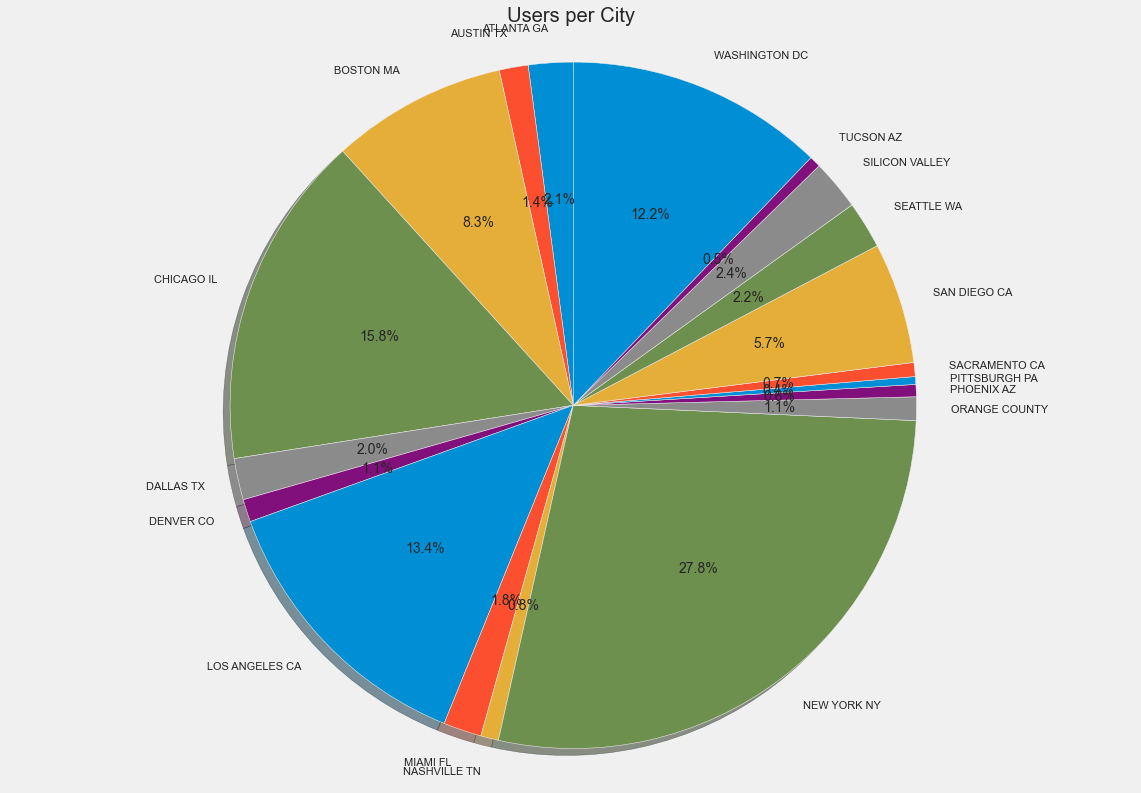

In [11]:
city_users = master_data.groupby('City')
city_users = city_users.Users.count()
labs = city_users.index
vals = city_users.values

plt.style.use('fivethirtyeight')
figp, axp = plt.subplots(figsize=(18,13))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')
plt.title('Users per City')
plt.show()

## Profit for each company change over the years with lineplot

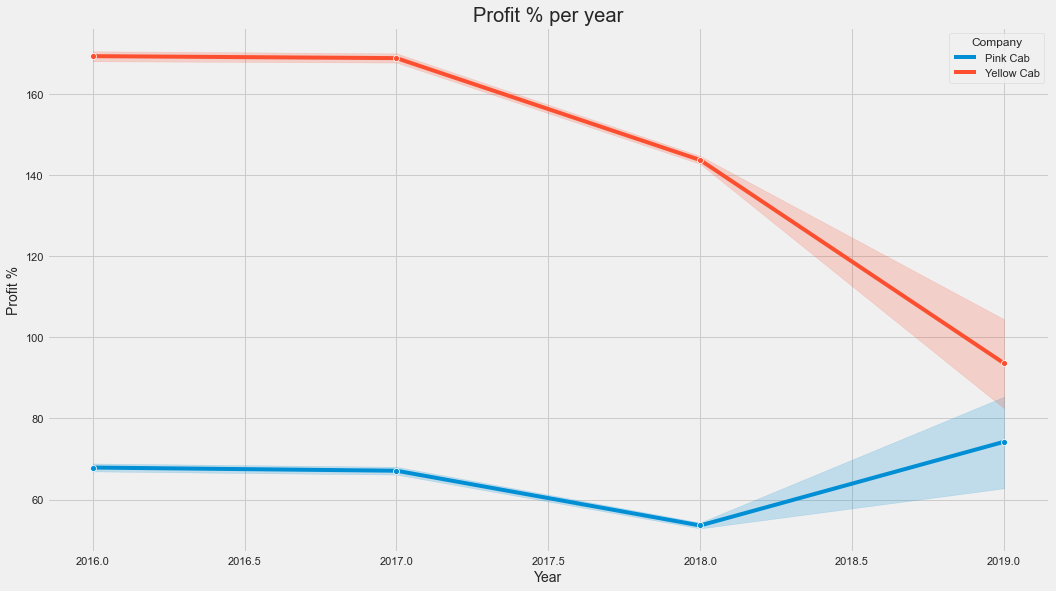

In [16]:
plt.figure(figsize = (16, 9))
sns.lineplot(x='year', y='Profit', hue="Company", data=master_data, marker='o')
plt.xlabel("Year", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per year")
plt.show()

### Yellow cab taxi company's profit decreases after 2017, while pink cab taxi company's profit increases after 2018

## Users for each city according to population

In [62]:
master_data['Users'].describe()

count    359392.000000
mean     158365.582267
std      100850.051020
min        3643.000000
25%       80021.000000
50%      144132.000000
75%      302149.000000
max      302149.000000
Name: Users, dtype: float64

### Total user count

In [11]:
master_data.groupby(['City'])['Users'].unique().sum()

array([1076804.])

In [18]:
urp = (master_data['Users'] /master_data['Population']) * 100 
city = master_data['City']



In [28]:
# Get the list of color
from random import randint

colors = []
n = len(master_data['City'].unique())

for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

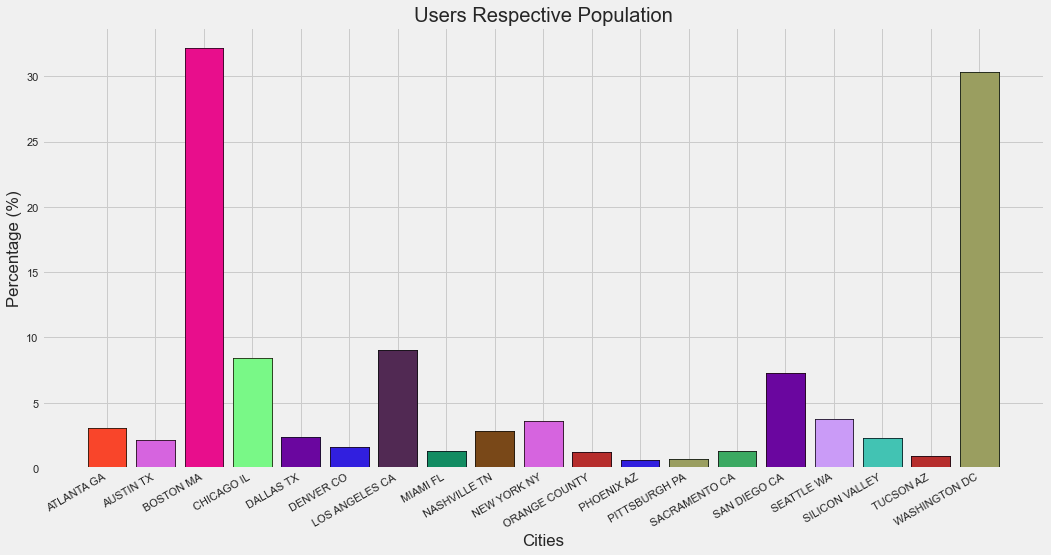

In [29]:
plt.figure(figsize = (16, 9))
plt.bar(city, urp, edgecolor='black', color = colors)
plt.gcf().autofmt_xdate()
plt.title('Users Respective Population')
plt.ylabel('Percentage (%)')
plt.xlabel('Cities')
plt.show()


# Yellow cab km travelled per of month

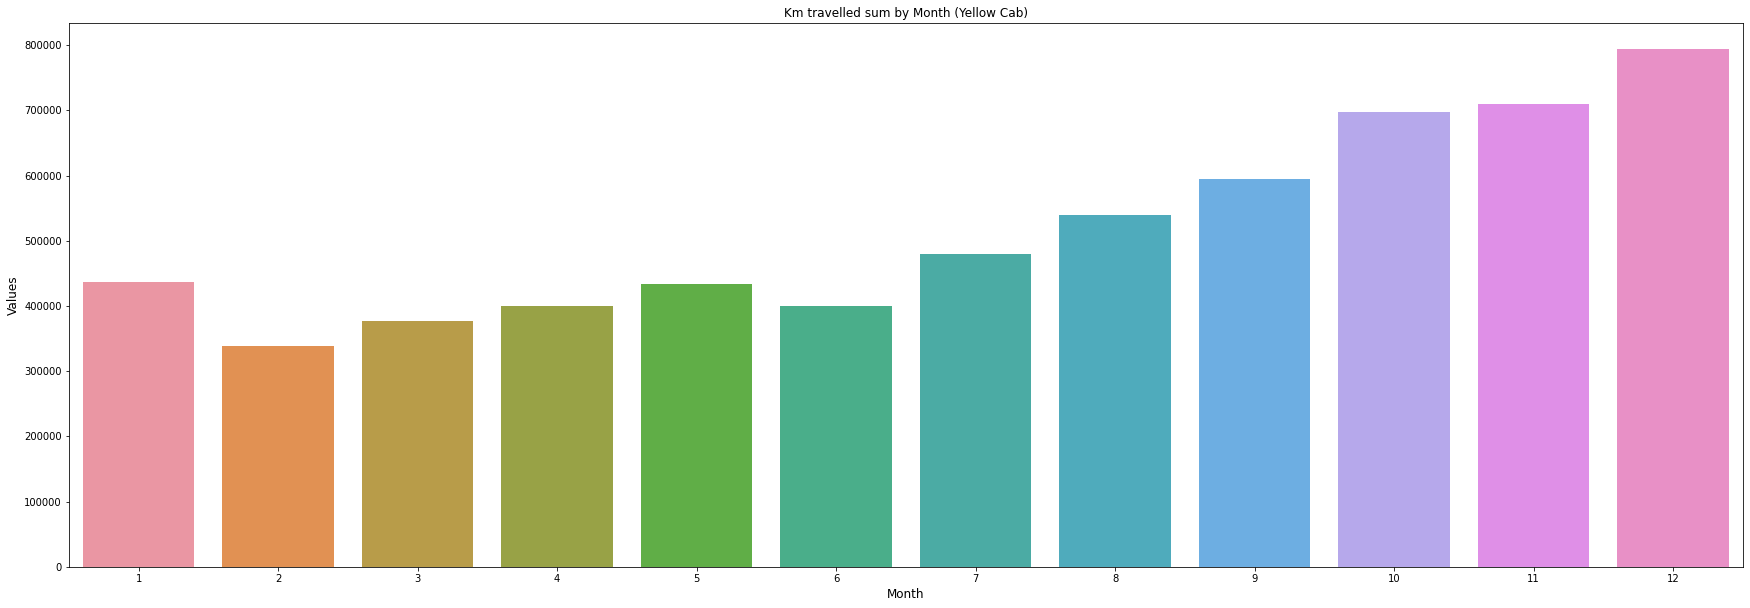

In [3]:

plot0 = master_data[master_data["Company"]=="Yellow Cab"].groupby(['month'])["KM Travelled"].sum()

plt.figure(figsize=(30,10))
sns.barplot(x=plot0.index,y=plot0.values)
plt.title('Km travelled sum by Month (Yellow Cab)',fontsize = 12)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Values',fontsize = 12)
plt.show()

# Pink Cab km travelled per of month

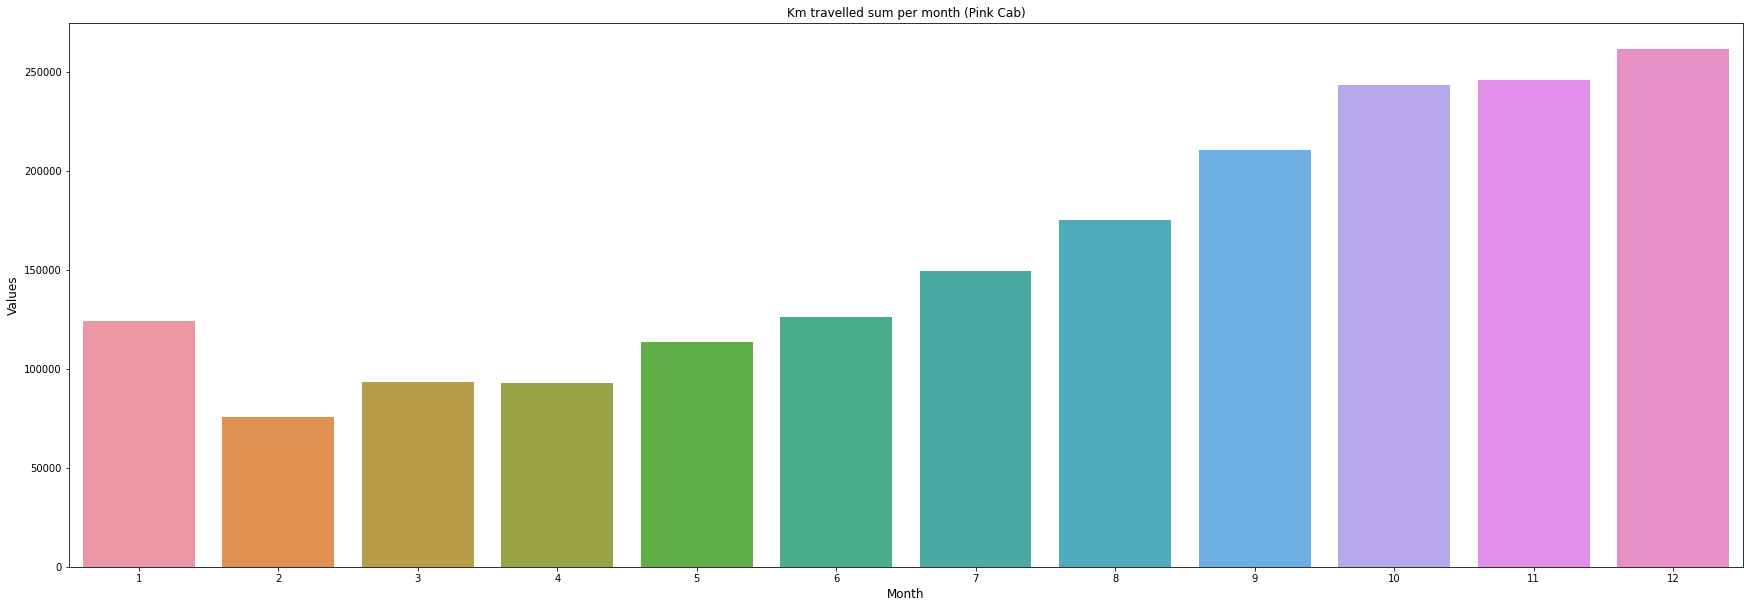

In [4]:
plot0 = master_data[master_data["Company"]=="Pink Cab"].groupby(['month'])["KM Travelled"].sum()

plt.figure(figsize=(30,10))
sns.barplot(x=plot0.index,y=plot0.values)
plt.title('Km travelled sum per month (Pink Cab)',fontsize = 12)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Values',fontsize = 12)
plt.show()

### Number of transaction per city based on company


### Check the unique data from city column

In [6]:
len(master_data['City'].unique())

19

### Transaction count for each city and company

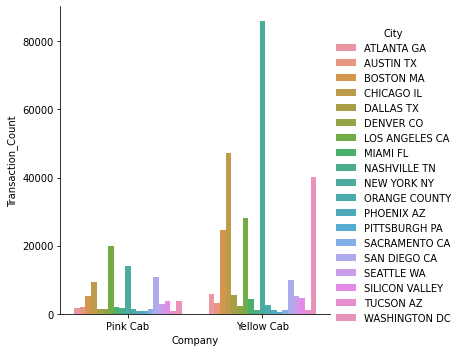

In [7]:
df = master_data.groupby(['City', 'Company']).agg(Transaction_Count=("Transaction ID", 'count'))

df = df.reset_index()

sb.catplot(x="Company",

           y="Transaction_Count",

           hue="City",

           data=df,ci="sd",kind='bar')

plt.show()

### The highest transaction id in new york yellow cab and pink cab the highest transaction id Miami

### Distrubution of transaction count over years 

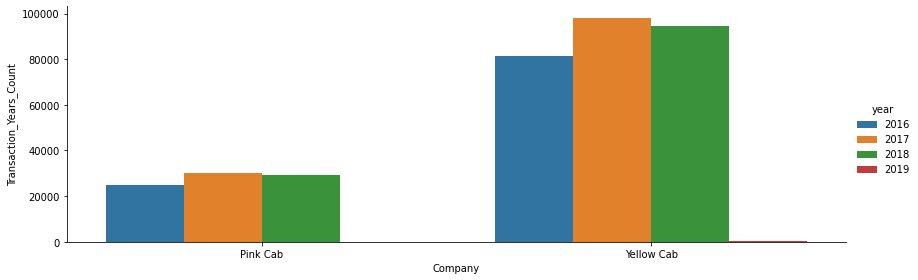

In [8]:
df=master_data.groupby(['Company','year']).agg(Transaction_Years_Count=("Transaction ID","count"))

df = df.reset_index()

sb.catplot(x="Company",

           y="Transaction_Years_Count",

           hue="year",

           data=df,ci="sd",kind='bar',height=4, aspect=3)

plt.show()

### Distrubution of number of unique customers over years

### Check the unique data from customer ID column

In [10]:
len(master_data["Customer ID"].unique())

46148

### Unique Customer Id for each year and company

Dataframe Shape: (8, 3)
      Company  year  Distrubution_Unique_Customers
0    Pink Cab  2016                           8914
1    Pink Cab  2017                           3874
2    Pink Cab  2018                           2037
3    Pink Cab  2019                              4
4  Yellow Cab  2016                          22095
5  Yellow Cab  2017                           6117
6  Yellow Cab  2018                           3096
7  Yellow Cab  2019                             11


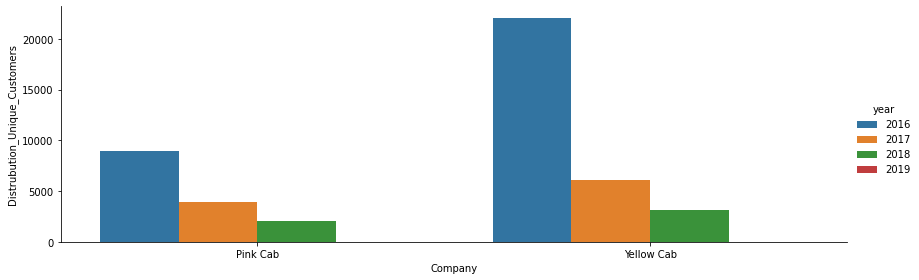

In [12]:
df=df.groupby(['Company','year']).agg(Distrubution_Unique_Customers=('Customer ID','count'))

df = df.reset_index()

print("Dataframe Shape:",df.shape)

print(df)

sb.catplot(x="Company",

           y="Distrubution_Unique_Customers",

           hue="year",

           data=df,ci="sd",kind='bar',height=4, aspect=3)

plt.show()




### Duplicate Customer ID for each company and year

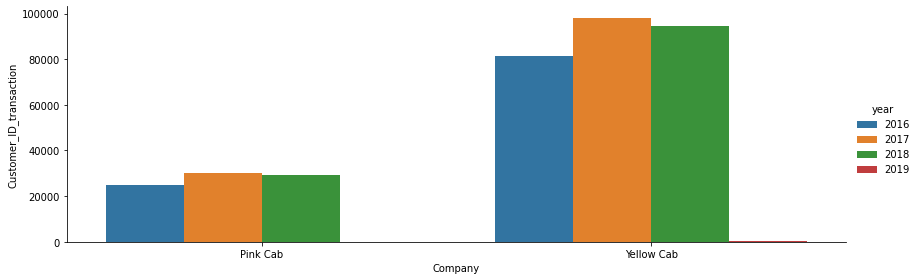

In [13]:
df=master_data.groupby(["Company","year"]).agg(Customer_ID_transaction=("Customer ID", "count"))

df = df.reset_index()


sb.catplot(x="Company",

           y="Customer_ID_transaction",

           hue="year",

           data=df,ci="sd",kind='bar',height=4, aspect=3)

plt.show()





### Mean profit for each company

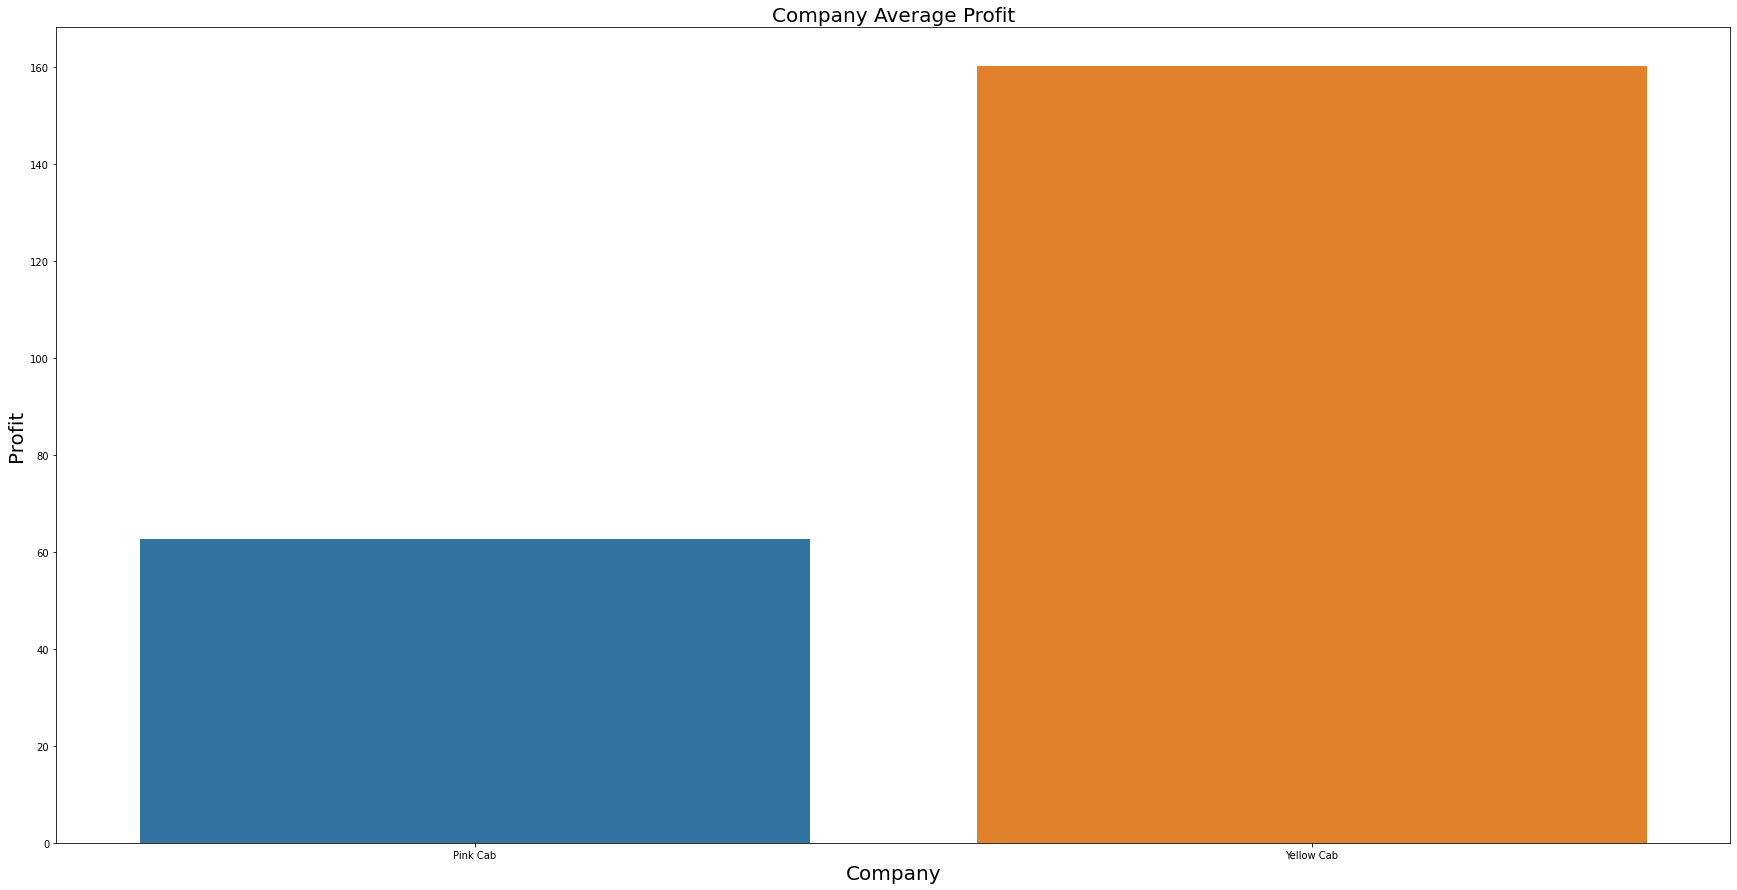

In [15]:
plot1= master_data.groupby(['Company'])["profit"].mean()

plt.figure(figsize=(30,15))
sns.barplot(x=plot1.index,y=plot1.values)
plt.title('Company Average Profit',fontsize = 20)
plt.xlabel('Company', fontsize = 20)
plt.ylabel('Profit',fontsize = 20)
plt.show()

### Average profit per year Pink Cab


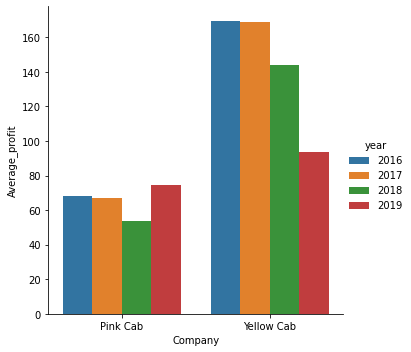

In [16]:
df= master_data.groupby(['year','Company']).agg(Average_profit=("profit","mean"))

df=df.reset_index()

sb.catplot(x='Company',y='Average_profit',hue='year',data=df,ci="sd",kind='bar')

### Monthly profit per year for each company

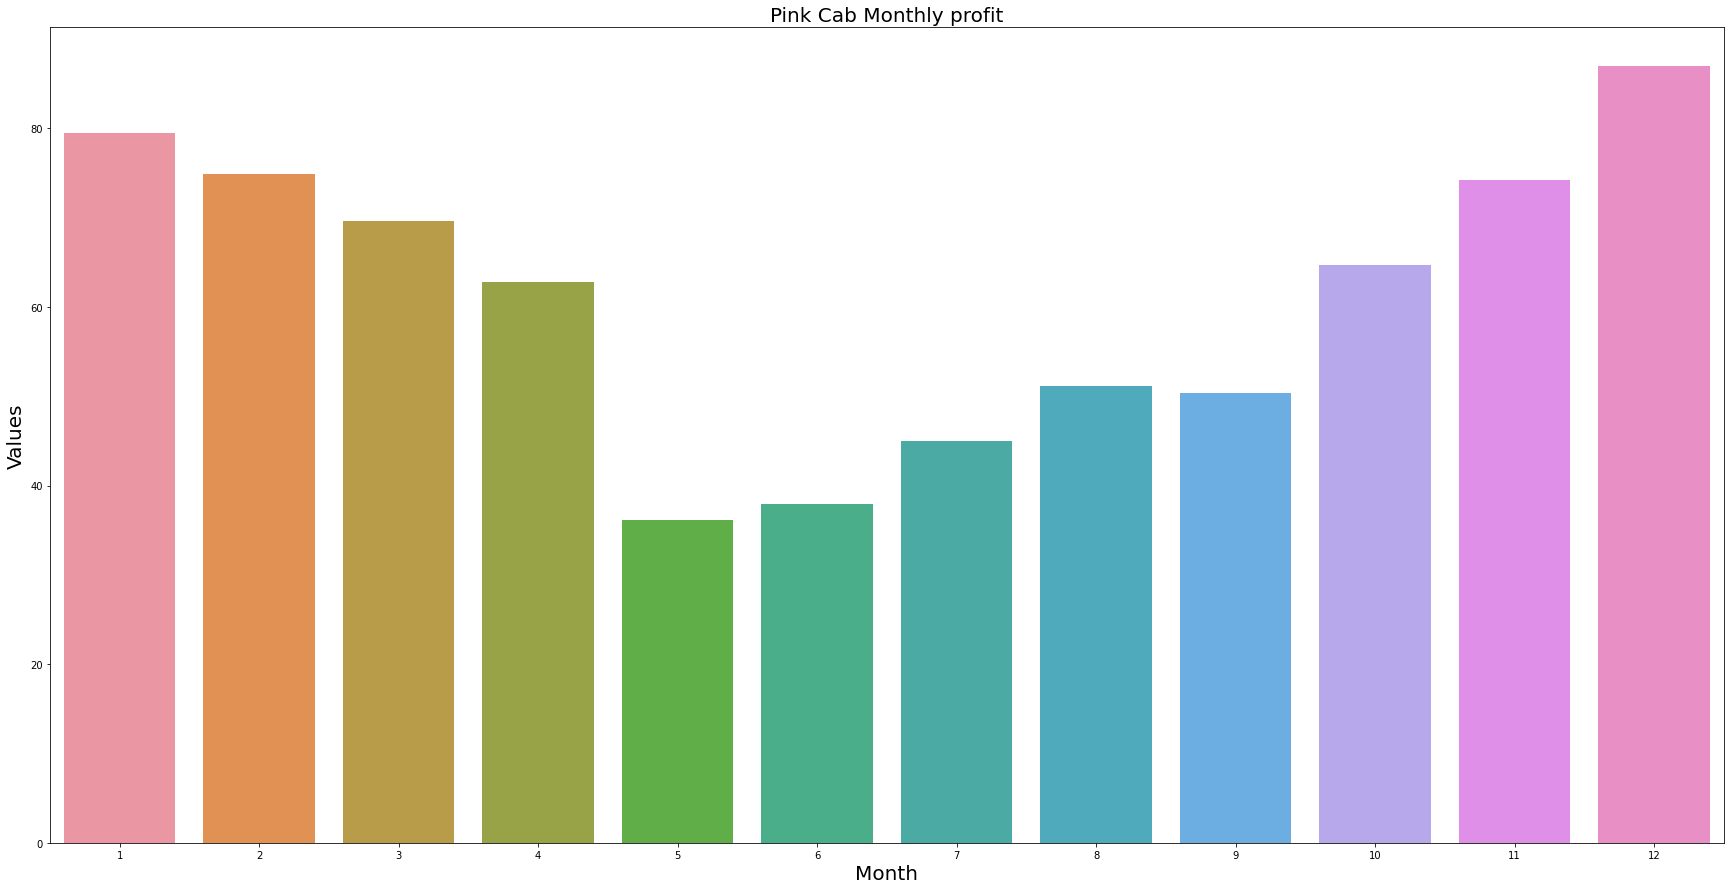

In [18]:
plot3=master_data[master_data["Company"]=="Pink Cab"].groupby(['month'])["profit"].mean()
plt.figure(figsize=(30,15))
sns.barplot(x=plot3.index,y=plot3.values)
plt.title('Pink Cab Monthly profit',fontsize = 20)
plt.xlabel('Month', fontsize = 20)
plt.ylabel('Values',fontsize = 20)
plt.show()

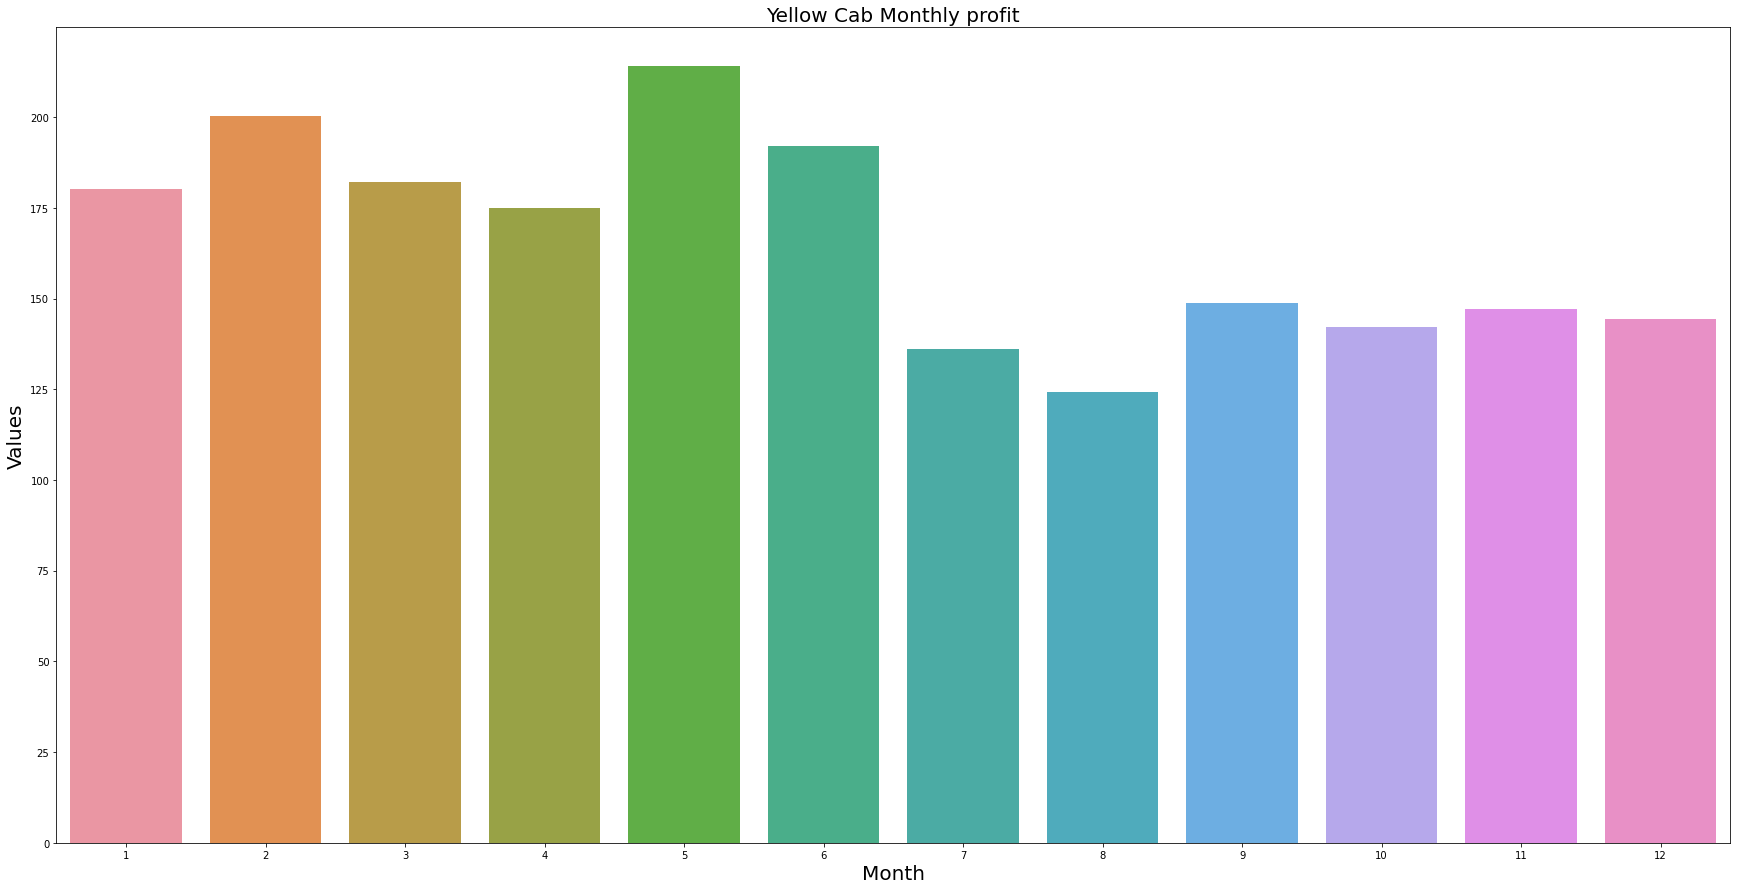

In [19]:
plot3=master_data[master_data["Company"]=="Yellow Cab"].groupby(['month'])["profit"].mean()
plt.figure(figsize=(30,15))
sns.barplot(x=plot3.index,y=plot3.values)
plt.title('Yellow Cab Monthly profit',fontsize = 20)
plt.xlabel('Month', fontsize = 20)
plt.ylabel('Values',fontsize = 20)
plt.show()

### Total customer per cab 


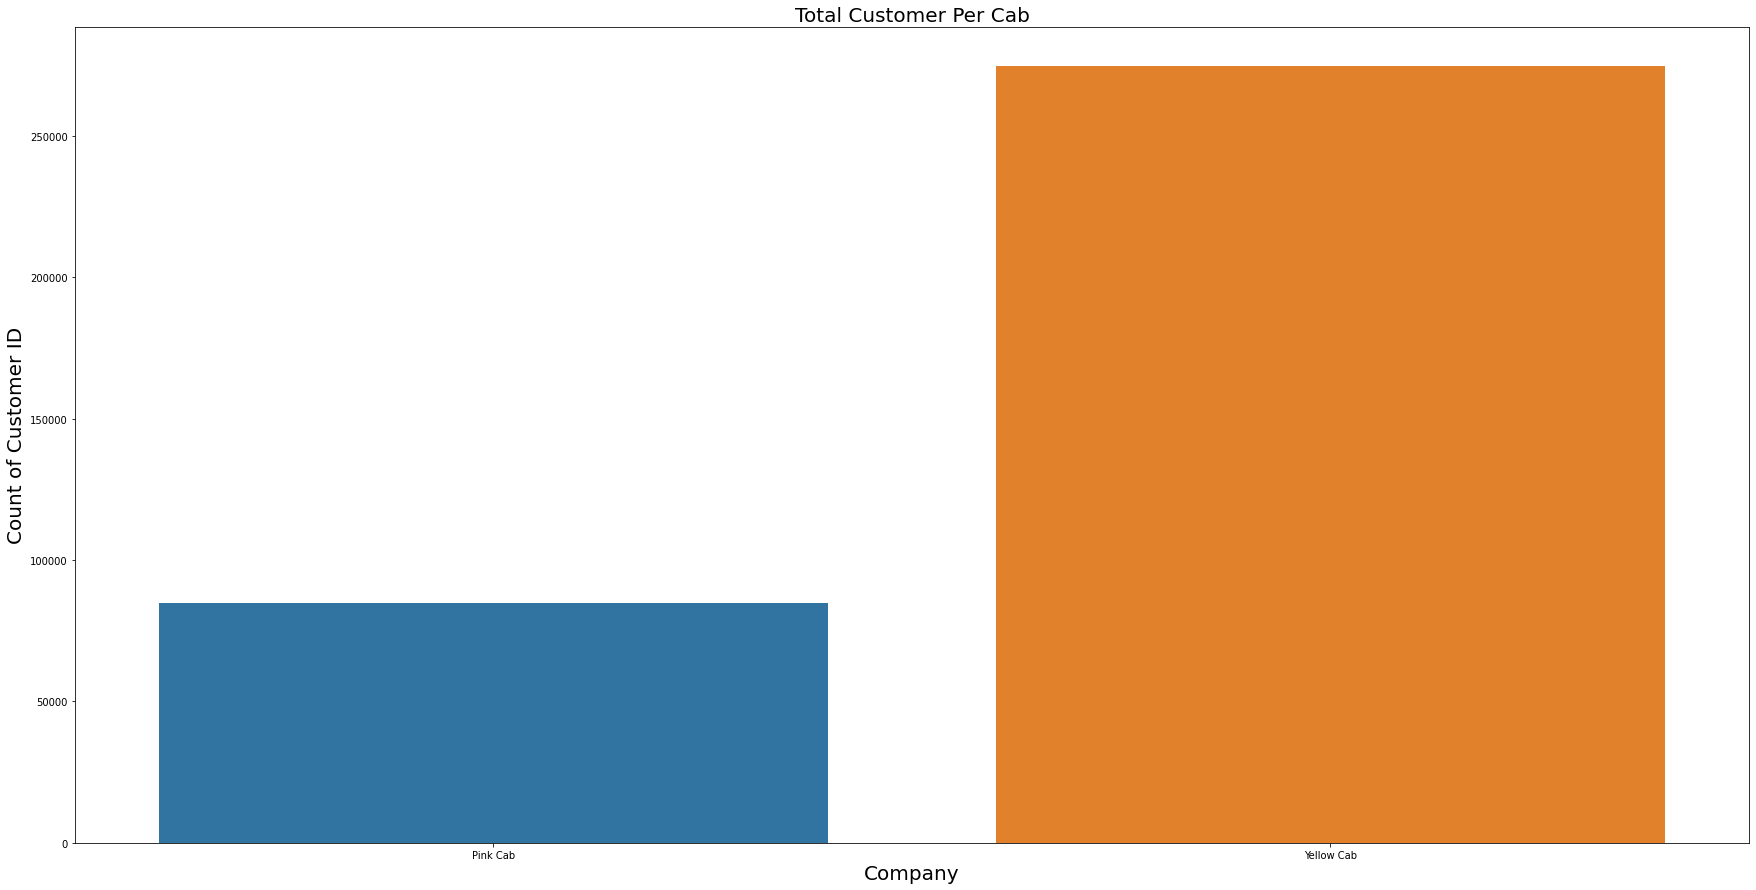

In [20]:
plot6=master_data.groupby(["Company"])["Customer ID"].count()
plt.figure(figsize=(30,15))
sns.barplot(x=plot6.index,y=plot6.values)
plt.title('Total Customer Per Cab',fontsize = 20)
plt.xlabel('Company', fontsize = 20)
plt.ylabel('Count of Customer ID',fontsize = 20)
plt.show()

### Total customer growth

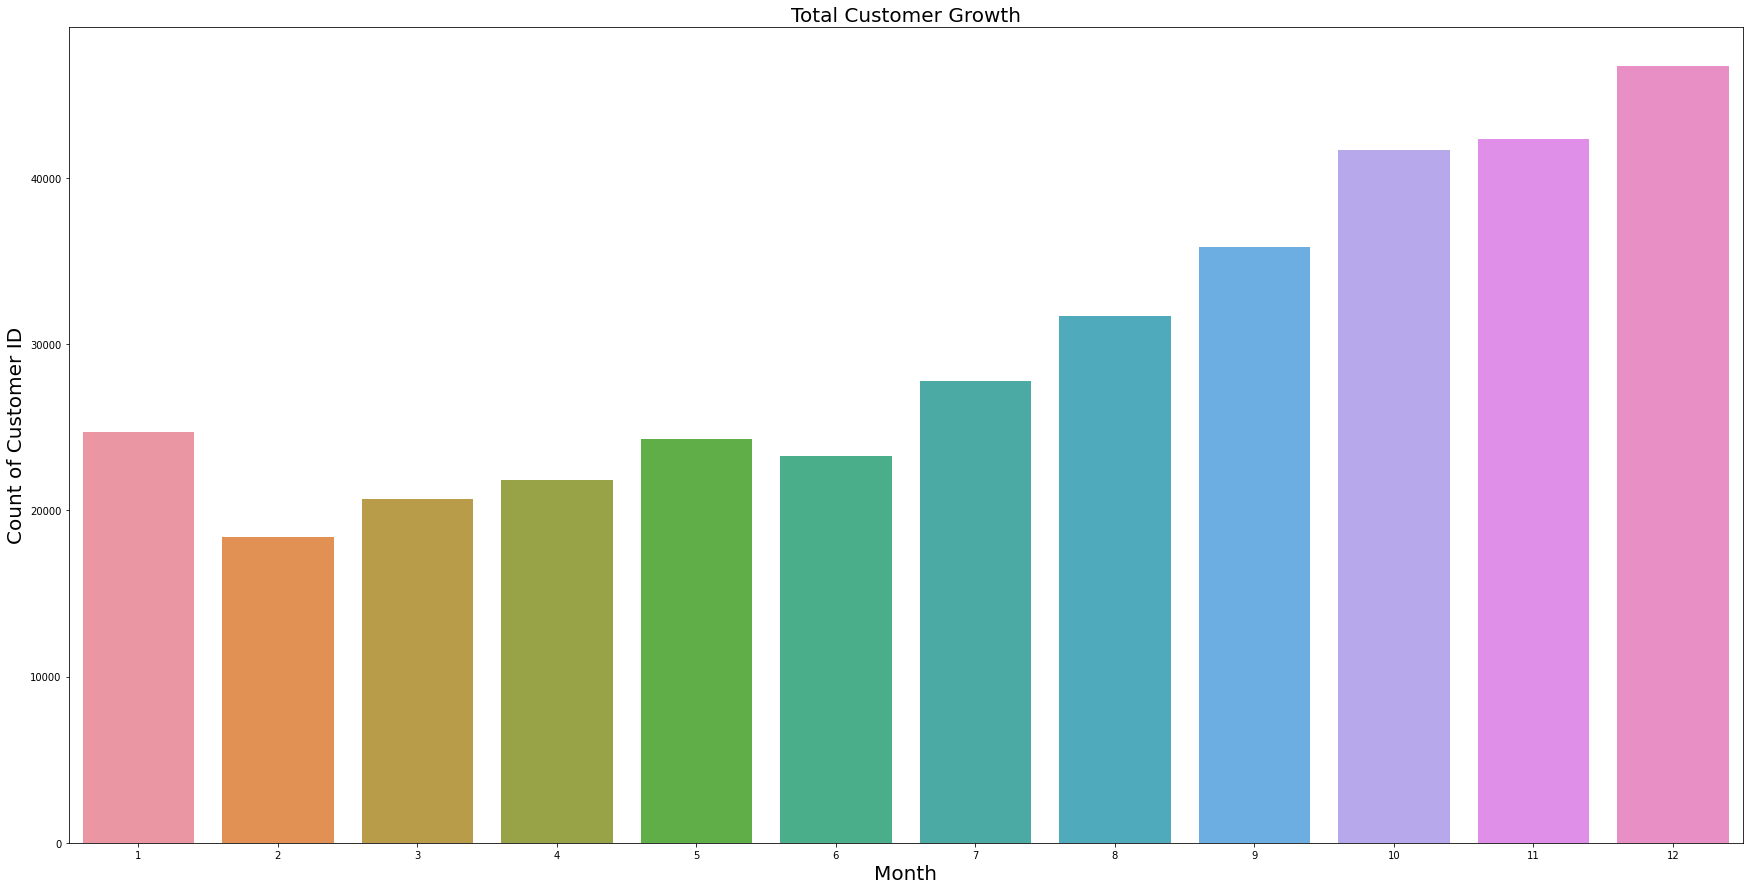

In [21]:
plot7=master_data.groupby(['month'])["Customer ID"].count()

plt.figure(figsize=(30,15))
sns.barplot(x=plot7.index,y=plot7.values)
plt.title('Total Customer Growth',fontsize = 20)
plt.xlabel('Month', fontsize = 20)
plt.ylabel('Count of Customer ID',fontsize = 20)
plt.show()


### Payment mode for each cab

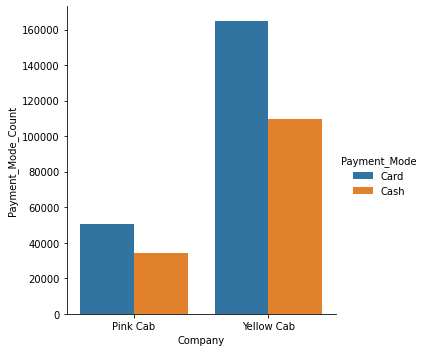

In [22]:
df=master_data.groupby(["Company","Payment_Mode"]).agg(Payment_Mode_Count=("Payment_Mode","count"))



df=df.reset_index()

sb.catplot(x='Company',y='Payment_Mode_Count',hue='Payment_Mode',data=df,ci="sd",kind='bar')


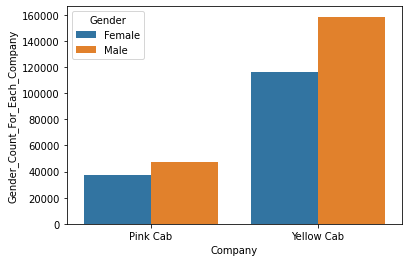

Gender     Company  Gender_Count_For_Each_Company
0  Female    Pink Cab                          37480
1  Female  Yellow Cab                         116000
2    Male    Pink Cab                          47231
3    Male  Yellow Cab                         158681

In [30]:
import matplotlib.pyplot as plt

import seaborn as sb

df = master_data.groupby(['Gender', 'Company']).agg(Gender_Count_For_Each_Company=("Gender", 'count'))

df = df.reset_index()

sb.barplot(x="Company",

           y="Gender_Count_For_Each_Company",

           hue="Gender",

           data=df)

plt.show()

df

In [12]:
master_data['Population'].describe()

count    3.593920e+05
mean     3.132198e+06
std      3.315194e+06
min      2.489680e+05
25%      6.712380e+05
50%      1.595037e+06
75%      8.405837e+06
max      8.405837e+06
Name: Population, dtype: float64

/Users/baris/opt/anaconda3/envs/homev/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


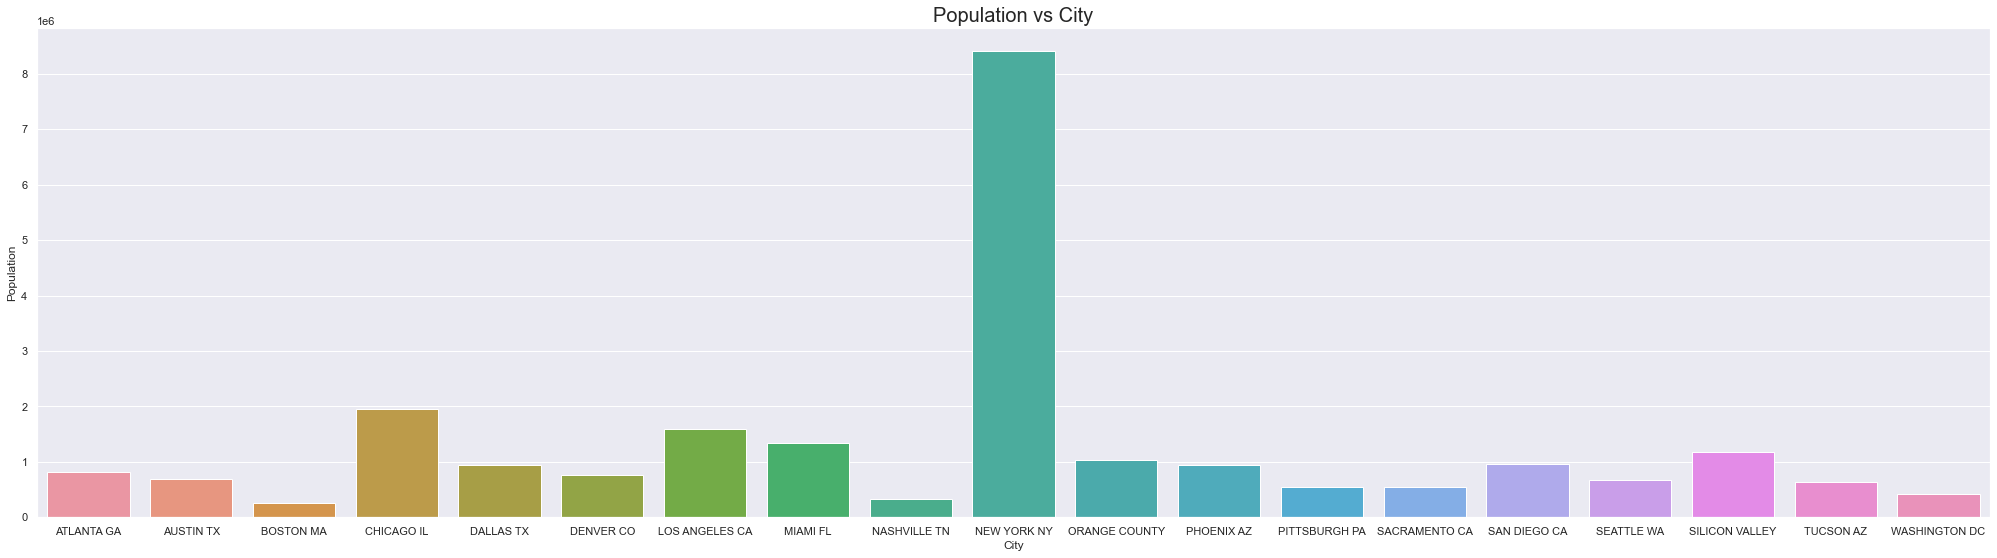

In [6]:
sns.set(style = 'darkgrid')

plt.figure(figsize = (25, 9))

sns.barplot(master_data['City'], master_data['Population'])
plt.title('Population vs City', fontsize=20)
plt.show()


### Cities which has population more than 1000000 are more profitible

In [4]:
a = master_data[(master_data.Population > 1000000)&(master_data.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = master_data[(master_data.Population < 1000000)&(master_data.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept the alternative hypothesis (H1): There is a difference in profit by population for the Pink Cab.')
else:
    print('H0')

50505 34206
P value is  3.645945885942243e-282
We accept the alternative hypothesis (H1): There is a difference in profit by population for the Pink Cab.


In [18]:
a = master_data[(master_data.Population > 1000000)&(master_data.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = master_data[(master_data.Population < 1000000)&(master_data.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept the alternative hypothesis (H1): There is a difference in profit by population for the Yellow Cab.')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding Population for Yellow Cab')

172993 101688
P value is  0.0
We accept the alternative hypothesis (H1): There is a difference in profit by population for the Yellow Cab.


### KM Travelled which are more profitible

In [4]:
master_data['KM Travelled'].describe()

count    359392.000000
mean         22.567254
std          12.233526
min           1.900000
25%          12.000000
50%          22.440000
75%          32.960000
max          48.000000
Name: KM Travelled, dtype: float64

In [5]:
a = master_data[(master_data['KM Travelled'] > 10)&(master_data.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = master_data[(master_data['KM Travelled'] < 10)&(master_data.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding age for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab')

67552 17085
P value is  0.0
We accept alternative hypothesis (H1) that there is a difference regarding age for Pink Cab


In [5]:
a = master_data[(master_data['KM Travelled'] > 10)&(master_data.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = master_data[(master_data['KM Travelled'] < 10)&(master_data.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding km travelled for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding km travelled for Yellow Cab')

219130 55249
P value is  0.0
We accept alternative hypothesis (H1) that there is a difference regarding km travelled for Yellow Cab


### Population and km travelled both create hypthesis

In [6]:
a = master_data[(master_data.Population > 1000000)& (master_data['KM Travelled'] < 10) &(master_data.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()

b = master_data[(master_data.Population > 1000000)& (master_data['KM Travelled'] > 10) &(master_data.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept the alternative hypothesis (H1): There is a difference in profit by population for the Yellow Cab.')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding Population for Yellow Cab')

34782 138019
P value is  0.0
We accept the alternative hypothesis (H1): There is a difference in profit by population for the Yellow Cab.


### Yellow Cab 

In [8]:
a = master_data[(master_data.Population > 1000000)& (master_data['KM Travelled'] < 10) &(master_data.Company=='Yellow Cab')].Profit.mean()

b = master_data[(master_data.Population > 1000000)& (master_data['KM Travelled'] > 10) &(master_data.Company=='Yellow Cab')].Profit.mean()

print(a,b)



51.89072718072594 238.45598071280165


In [13]:
a = master_data[(master_data.Population > 1000000)& (master_data['KM Travelled'] < 10) &(master_data.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()

b = master_data[(master_data.Population > 1000000)& (master_data['KM Travelled'] > 10) &(master_data.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept the alternative hypothesis (H1): There is a difference in profit by population for the Yellow Cab.')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding Population for Yellow Cab')

34782 81111
P value is  0.0
We accept the alternative hypothesis (H1): There is a difference in profit by population for the Yellow Cab.


### Pink Cab

In [34]:
a = master_data[(master_data.Population > 1000000)& (master_data['KM Travelled'] > 10) &(master_data.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()

b = master_data[(master_data.Population > 1000000)& (master_data['KM Travelled'] < 10) &(master_data.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept the alternative hypothesis (H1): There is a difference in profit by population for the Pink Cab.')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding Population for Pink Cab')

40295 10162
P value is  0.0
We accept the alternative hypothesis (H1): There is a difference in profit by population for the Pink Cab.


In [39]:
df1=a.reset_index(name ='a')

In [40]:
df2=b.reset_index(name ='b')

In [10]:
a.describe()

count    40295.000000
mean        83.660172
std         87.676079
min       -160.536000
25%         24.456000
50%         63.874000
75%        122.540000
max       1119.480000
Name: Profit, dtype: float64

In [44]:
a = master_data[(master_data.Population > 1000000)& (master_data['KM Travelled'] > 10) &(master_data.Company=='Pink Cab')].groupby('day').Profit.mean()

b = master_data[(master_data.Population > 1000000)& (master_data['KM Travelled'] < 10) &(master_data.Company=='Pink Cab')].groupby('day').Profit.mean()
print(a.shape[0],b.shape[0])

31 31


In [53]:
df1=a.reset_index(name ='long_distance')

In [54]:
df2=b.reset_index(name ='short_distance')

In [60]:
df3=pd.merge(df1,df2, on='day')

df3

day  long_distance  short_distance
0     1      82.968054       18.357795
1     2      86.875545       18.955092
2     3      88.577822       15.633726
3     4      79.356055       17.033574
4     5      92.648971       20.530209
5     6      72.547402       15.912829
6     7      86.363634       21.886684
7     8      86.388298       21.887527
8     9      82.592014       16.994862
9    10      85.715681       18.730010
10   11      83.193451       18.264855
11   12      95.712085       22.650778
12   13      76.287825       16.627043
13   14      79.389729       17.397091
14   15      90.869772       19.422811
15   16      82.482454       18.804477
16   17      92.478305       20.949358
17   18      80.729952       16.384732
18   19      94.996812       18.725319
19   20      82.191843       17.635490
20   21      80.197376       18.260579
21   22      78.202747       19.190034
22   23      76.345491       16.893473
23   24      83.200586       18.437453
24   25      73.748546       16.557873
25   26      90.208741       20.088308
26   27      74.441442       16.574312
27   28      82.780523       15.796257
28   29      78.115724       17.622086
29   30      69.968074       17.569268
30   31      94.459318       21.791812

In [63]:
dfm = df3.melt('day', var_name='cols', value_name='vals')

dfm

day            cols       vals
0     1   long_distance  82.968054
1     2   long_distance  86.875545
2     3   long_distance  88.577822
3     4   long_distance  79.356055
4     5   long_distance  92.648971
..  ...             ...        ...
57   27  short_distance  16.574312
58   28  short_distance  15.796257
59   29  short_distance  17.622086
60   30  short_distance  17.569268
61   31  short_distance  21.791812

[62 rows x 3 columns]

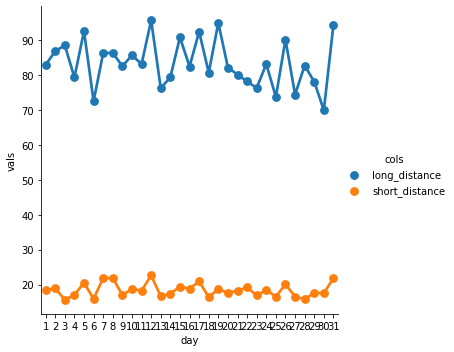

In [65]:
import seaborn as sns


sns.catplot(x="day", y="vals", hue='cols', data=dfm, kind='point',)




